<a href="https://colab.research.google.com/github/gourav1996-grv/bank_comments_review_analysis/blob/main/TXTA_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**We are having a dataset related to bank .It is consists of services used by customer,heading of response,Complete review,name of customer,Bank  and rating given by customer.**\

We have to do Analysis on data given in Reviews filled by customer.\
Here we have labels as Ratings representing reviews given by customer.\
Various companies are doing text analysis to understand about the customer,like his behaviour,satisfaction ,need,improvement from the reviews given by customer.
They analyse reviews by analysing words used by customer to understand sentiments of customer.By reviews they study about customer either review is given in Positive sentiment or Negative.\
That helps in growth of a company by understanding about their customer.

#Import required libraries 

In [ ]:
import pandas as pd
import re
import seaborn as sns
import numpy as np

In [ ]:
#Plot library
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
import os, re
import sklearn 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [ ]:
#Models library
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.manifold import TSNE
from imblearn.ensemble import BalancedBaggingClassifier


In [ ]:
#Import dataset csv file
data=pd.read_csv('/content/A21__5_TXTA_dataset.csv')

In [ ]:
#Take a look at data
data.head()

,Title,Heading,Reviewer,Date,Review,Bank,Rating
0,Car Loan,Good Experience,L,2019-07-13,"Recently I took car loan from Bank of Baroda, ...",Bank-Of-Baroda,4.0
1,Saving Account,Good,D G,2019-07-12,I have saving account with Bank of Baroda. I a...,Bank-Of-Baroda,3.0
2,Saving Account,Good till date,GAUTAM,2019-07-12,My savings account is with Bank of Baroda. It ...,Bank-Of-Baroda,5.0
3,Saving Account,Good,MI,2019-07-11,I am holding a salary account in BANK OF BARO...,Bank-Of-Baroda,5.0
4,Credit Card,Excellent,DA,2019-07-11,I have been using Bank of Baroda credit card b...,Bank-Of-Baroda,5.0


================================================

In [ ]:
data.shape

(5000, 7)

In [ ]:
#Check for schemas of attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     5000 non-null   object 
 1   Heading   5000 non-null   object 
 2   Reviewer  4998 non-null   object 
 3   Date      5000 non-null   object 
 4   Review    5000 non-null   object 
 5   Bank      5000 non-null   object 
 6   Rating    5000 non-null   float64
dtypes: float64(1), object(6)
memory usage: 273.6+ KB


#Dataset Description
1.Title-- Customers information on type of services choosen from the bank,either related to Account(Saving Account) or Loan.(Car loan etc.)\
2.Heading--Experience of customer about Bank.\
3.Reviewer--Name of customer.\
4.Date-On which date review filled.\
5.Review- Detail review given by customer.\
6.Bank-Name of the Bank.\
Rating--Rating given to Bank by customer.

In [ ]:
data.head()

,Title,Heading,Reviewer,Date,Review,Bank,Rating
0,Car Loan,Good Experience,L,2019-07-13,"Recently I took car loan from Bank of Baroda, ...",Bank-Of-Baroda,4.0
1,Saving Account,Good,D G,2019-07-12,I have saving account with Bank of Baroda. I a...,Bank-Of-Baroda,3.0
2,Saving Account,Good till date,GAUTAM,2019-07-12,My savings account is with Bank of Baroda. It ...,Bank-Of-Baroda,5.0
3,Saving Account,Good,MI,2019-07-11,I am holding a salary account in BANK OF BARO...,Bank-Of-Baroda,5.0
4,Credit Card,Excellent,DA,2019-07-11,I have been using Bank of Baroda credit card b...,Bank-Of-Baroda,5.0


#Data Preprocessing and Cleaning

In [ ]:
#Check for Null values 
data.isnull().sum()

Title       0
Heading     0
Reviewer    2
Date        0
Review      0
Bank        0
Rating      0
dtype: int64

There are 2 null values in 'Reviewer' column.
We can drop them,as the proportion of null values found is very low.

In [ ]:
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)

Drop null values and reset index as well,because after dropping those 2 indexes would be missing from 'data' dataframe.

#Concatenating review text and summary
As details in Heading column and Review for a particular customer wont be contrdicting.
So combine them into one and make it more detailed.

In [ ]:
data['Reviews']=data['Review']+ data['Heading']
data=data.drop(['Review','Heading'], axis=1)
data.head()

,Title,Reviewer,Date,Bank,Rating,Reviews
0,Car Loan,L,2019-07-13,Bank-Of-Baroda,4.0,"Recently I took car loan from Bank of Baroda, ..."
1,Saving Account,D G,2019-07-12,Bank-Of-Baroda,3.0,I have saving account with Bank of Baroda. I a...
2,Saving Account,GAUTAM,2019-07-12,Bank-Of-Baroda,5.0,My savings account is with Bank of Baroda. It ...
3,Saving Account,MI,2019-07-11,Bank-Of-Baroda,5.0,I am holding a salary account in BANK OF BARO...
4,Credit Card,DA,2019-07-11,Bank-Of-Baroda,5.0,I have been using Bank of Baroda credit card b...


#Analyse Rating variable.

In [ ]:
data['Rating'].value_counts()

5.0    2025
4.0    1594
3.0     611
2.0     196
1.0     196
4.5     189
3.5     136
2.5      38
0.5       8
1.5       5
Name: Rating, dtype: int64

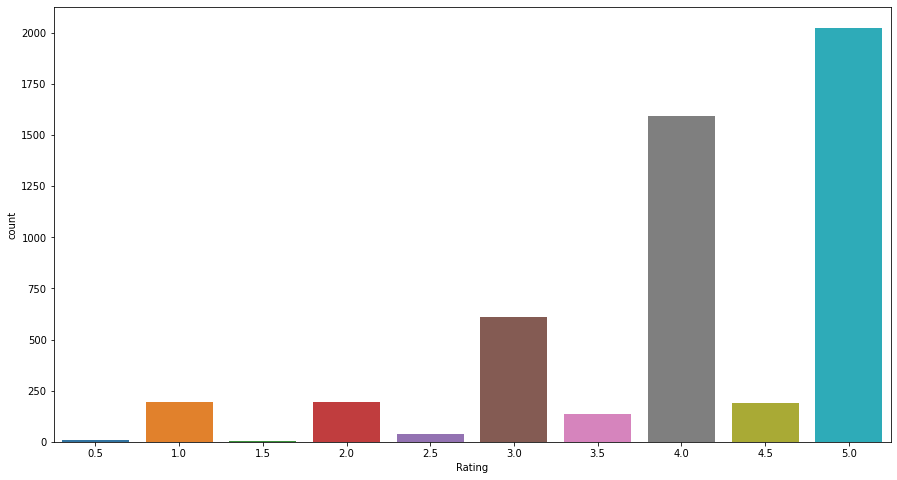

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='Rating',data=data)

As we can see there are lot of values for rating.\
But we wont be using these many number of rating categories.\
We will convert them into three category--**Positive,Neutral and Negative.**
That is values above 3 --Positive rating,\
Equal to 3---Neutral rating.\
Less than 3---Negative rating.

In [ ]:
def reviews_conversion(col):
  if col==3:
    value="Neutral"
  elif col>=3:
    value="Positive"
  else:
    value="Negative"
  return value


In [ ]:
data['sentiment']=data['Rating'].apply(reviews_conversion)

In [ ]:
data.head()

,Title,Reviewer,Date,Bank,Rating,Reviews,sentiment
0,Car Loan,L,2019-07-13,Bank-Of-Baroda,4.0,"Recently I took car loan from Bank of Baroda, ...",Positive
1,Saving Account,D G,2019-07-12,Bank-Of-Baroda,3.0,I have saving account with Bank of Baroda. I a...,Neutral
2,Saving Account,GAUTAM,2019-07-12,Bank-Of-Baroda,5.0,My savings account is with Bank of Baroda. It ...,Positive
3,Saving Account,MI,2019-07-11,Bank-Of-Baroda,5.0,I am holding a salary account in BANK OF BARO...,Positive
4,Credit Card,DA,2019-07-11,Bank-Of-Baroda,5.0,I have been using Bank of Baroda credit card b...,Positive


In [ ]:
data['sentiment'].value_counts()

Positive    3944
Neutral      611
Negative     443
Name: sentiment, dtype: int64

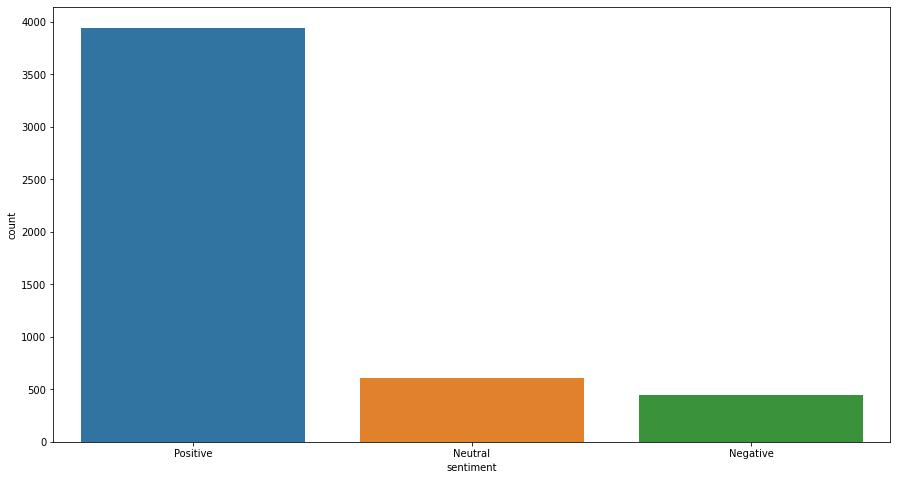

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='sentiment',data=data)

So what threshold values we have set for converting Rating into Sentiments,it is coming out,number of Positive ratings are more than Negative.

In [ ]:
bank_list=list(data['Bank'].unique())


In [ ]:
banks_number_of_reviews=[]
for i in bank_list:
  m=len(data[data['Bank']==i])
  banks_number_of_reviews.append(m)
  


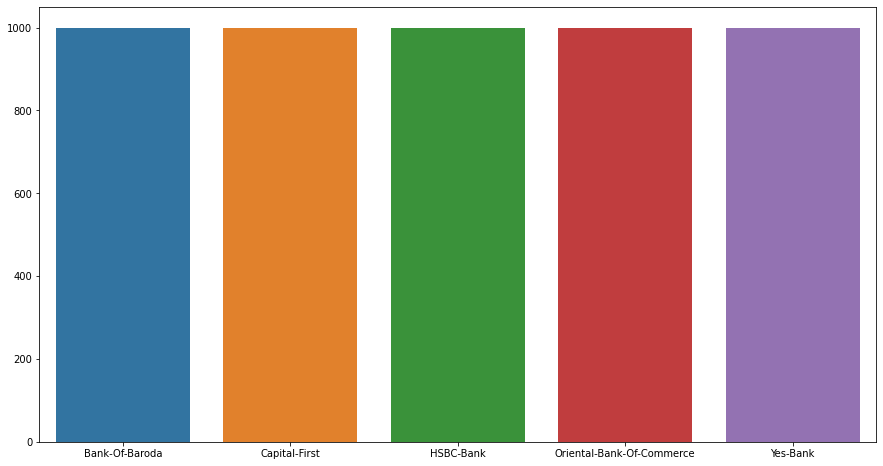

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=bank_list,y=banks_number_of_reviews)

Above plot shows there are equal number of records for each Bank.

In [ ]:
title_list=list(data['Title'].unique())
title_list

['Car Loan',
 'Saving Account',
 'Credit Card',
 'Personal Loan',
 'Home Loan',
 'Two Wheeler Loan',
 'Education Loan',
 'Fixed Deposit',
 'Current Account',
 'Other Loan',
 'Recurring Deposit',
 'All Products']

In [ ]:
title_positive_sent=[]
title_neutral_sent=[]
title_negative_sent=[]

for i in title_list:
  x=len(data[(data['sentiment']=='Positive')& (data['Title']==i)])/len(data[data['Title']==i])*100
  y=len(data[(data['sentiment']=='Neutral')& (data['Title']==i)])/len(data[data['Title']==i])*100
  z=len(data[(data['sentiment']=='Negative')& (data['Title']==i)])/len(data[data['Title']==i])*100
  title_positive_sent.append(x)
  title_neutral_sent.append(y)
  title_negative_sent.append(z)




Text(0.5, 1.0, 'Positive sentiment by customer among total no of sentiment for that category in Percent')

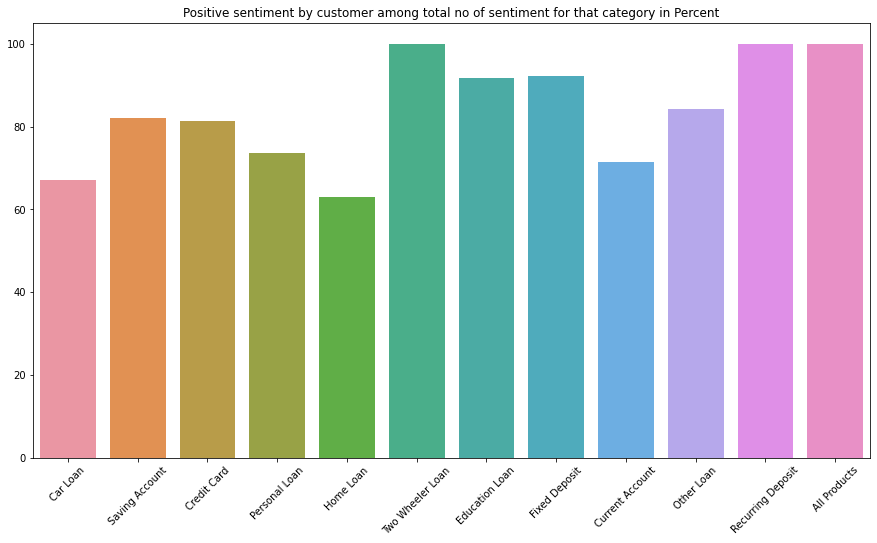

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=title_list,y=title_positive_sent)
plt.xticks(rotation=45)
plt.title("Positive sentiment by customer among total no of sentiment for that category in Percent")

Text(0.5, 1.0, 'Neutral sentiment by customer among total no of sentiment for that category in Percent')

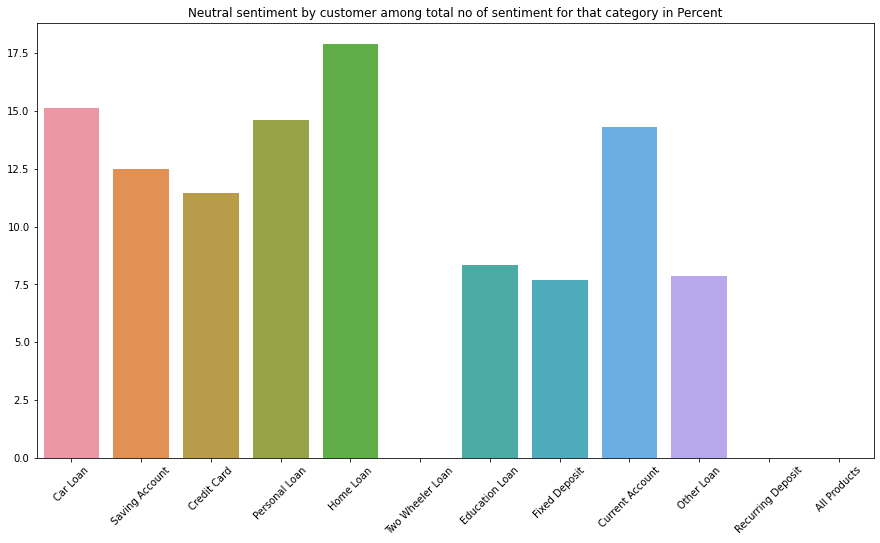

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=title_list,y=title_neutral_sent)
plt.xticks(rotation=45)
plt.title("Neutral sentiment by customer among total no of sentiment for that category in Percent")

Text(0.5, 1.0, 'Negative sentiment by customer among total no of sentiment for that category in Percent')

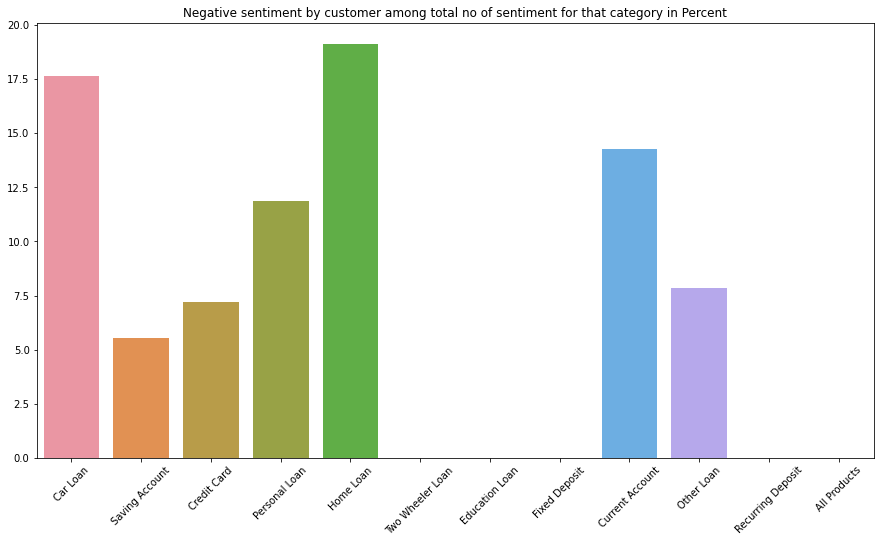

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=title_list,y=title_negative_sent)
plt.xticks(rotation=45)
plt.title("Negative sentiment by customer among total no of sentiment for that category in Percent")

Interpretation from above 3 plots:\
1.Two wheeler loan,Returning deposit,All products customer are highly satisfied by services provided to them,no negative or neutral reviews.\
2.Home loan customer are not happy with services provided,lots of reason behind that.


#Handling time column
We have date column which contains day,month and year values.
Let's extract theses values for better visualisation.

In [ ]:
# new data frame which has date and year
data_day_month_year = data["Date"].str.split("-", n = 3, expand = True) 

#Extract Day from new dataframe
data['Day']=data_day_month_year[2]

#Extract Month from new dataframe
data['Month']=data_day_month_year[1]

#Extract Year from new dataframe
data['Year']=data_day_month_year[0]

In [ ]:
data.head()

,Title,Reviewer,Date,Bank,Rating,Reviews,sentiment,Day,Month,Year
0,Car Loan,L,2019-07-13,Bank-Of-Baroda,4.0,"Recently I took car loan from Bank of Baroda, ...",Positive,13,07,2019
1,Saving Account,D G,2019-07-12,Bank-Of-Baroda,3.0,I have saving account with Bank of Baroda. I a...,Neutral,12,07,2019
2,Saving Account,GAUTAM,2019-07-12,Bank-Of-Baroda,5.0,My savings account is with Bank of Baroda. It ...,Positive,12,07,2019
3,Saving Account,MI,2019-07-11,Bank-Of-Baroda,5.0,I am holding a salary account in BANK OF BARO...,Positive,11,07,2019
4,Credit Card,DA,2019-07-11,Bank-Of-Baroda,5.0,I have been using Bank of Baroda credit card b...,Positive,11,07,2019


## Sentimental Counts for years

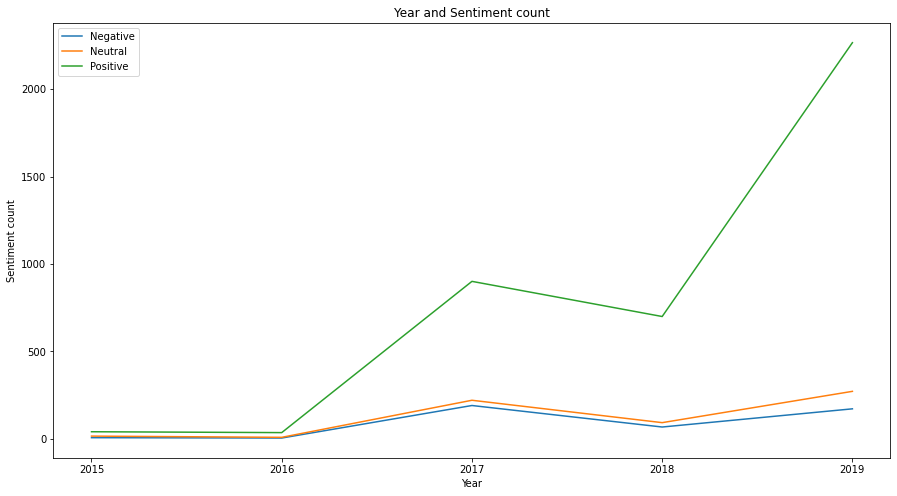

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(data.groupby(['Year','sentiment'])['sentiment'].count().unstack())
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.legend(['Negative','Neutral','Positive'],loc='upper left')
plt.show()

Plot shows that with the increment in years all types of sentiment reviews increase but there is a drastic increment in positive reviews.

#Sentiment for each day in month over the years

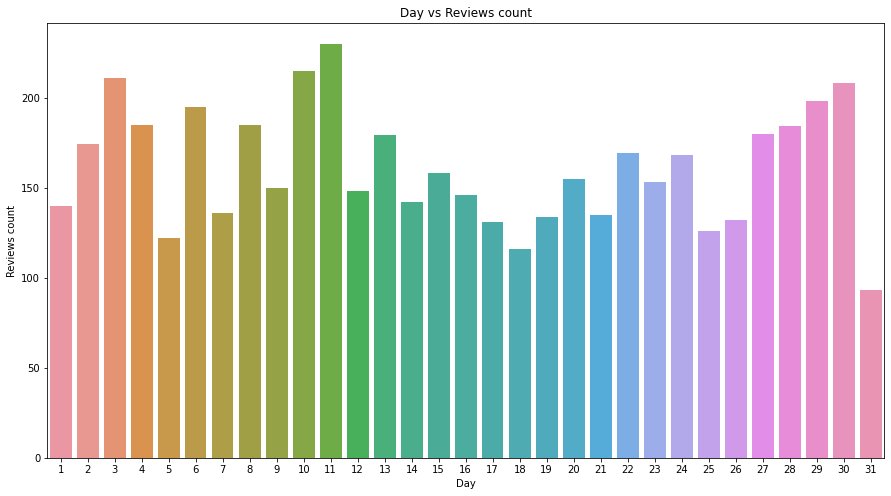

In [ ]:
#Creating a dataframe
day=pd.DataFrame(data.groupby('Day')['Reviews'].count()).reset_index()
day['Day']=day['Day'].astype('int64')
day.sort_values(by=['Day'])

#Plotting the graph
plt.figure(figsize=(15,8))
sns.barplot(x="Day", y="Reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

Above plot shows ,in the beginning and end ,no of customer filled reviews are less compared to other days before or after them.

#Text cleaning:

In [ ]:
reviews_only=data['Reviews']

In [ ]:
corpus_reviews=[re.sub('[^A-Za-z\s.]+','',x) for x in reviews_only]
corpus_reviews=[re.sub('\d+','',x) for x in corpus_reviews]
corpus_reviews=[x.lower() for x in corpus_reviews]

In [ ]:
corpus_reviews[0]

'recently i took car loan from bank of baroda i took rs.  lakhs for the duration of five years bank of baroda they gave me . of interest per annum. totally they taken only one day to sanction the amount i got the on road price of the card. the bank didnt any take insurance fee.good experience'

In [ ]:
data['Reviews']=corpus_reviews

In [ ]:
data.head()

,Title,Reviewer,Date,Bank,Rating,Reviews,sentiment,Day,Month,Year
0,Car Loan,L,2019-07-13,Bank-Of-Baroda,4.0,recently i took car loan from bank of baroda i...,Positive,13,07,2019
1,Saving Account,D G,2019-07-12,Bank-Of-Baroda,3.0,i have saving account with bank of baroda. i a...,Neutral,12,07,2019
2,Saving Account,GAUTAM,2019-07-12,Bank-Of-Baroda,5.0,my savings account is with bank of baroda. it ...,Positive,12,07,2019
3,Saving Account,MI,2019-07-11,Bank-Of-Baroda,5.0,i am holding a salary account in bank of baro...,Positive,11,07,2019
4,Credit Card,DA,2019-07-11,Bank-Of-Baroda,5.0,i have been using bank of baroda credit card b...,Positive,11,07,2019


In [ ]:
data.iloc[0]['Reviews']

'recently i took car loan from bank of baroda i took rs.  lakhs for the duration of five years bank of baroda they gave me . of interest per annum. totally they taken only one day to sanction the amount i got the on road price of the card. the bank didnt any take insurance fee.good experience'

In [ ]:
data['no_stop_word_reviews']=np.nan
for j in range(len(data['Reviews'])):
  no_stop_words_list=[]
  word_reveiws=re.findall('\w+',data['Reviews'].iloc[j])
  for i in word_reveiws:
    if i not in STOPWORDS:
      no_stop_words_list.append(i)
    no_stop_words_join=' '.join(no_stop_words_list)
    data['no_stop_word_reviews'].iloc[j]=no_stop_words_join


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
data['no_stop_word_reviews'][5]

'taken personal loan bank baroda months processed directly bank holding salary account process smooth time received card loan amount low given bank duration years rate interest low good bank low interest personal loan'

**We have removed all the stop words in the review column.** 



#Evaluate the number of words and letters in each reviews.
It will help to understand,what is the average length of words and letters we can expect in any customer review

In [ ]:
data['review_len'] = data['Reviews'].astype(str).apply(len)
data['word_count'] = data['Reviews'].apply(lambda x: len(str(x).split()))

In [ ]:
data.head()

,Title,Reviewer,Date,Bank,Rating,Reviews,sentiment,Day,Month,Year,no_stop_word_reviews,review_len,word_count
0,Car Loan,L,2019-07-13,Bank-Of-Baroda,4.0,recently i took car loan from bank of baroda i...,Positive,13,07,2019,recently took car loan bank baroda took rs lak...,292,57
1,Saving Account,D G,2019-07-12,Bank-Of-Baroda,3.0,i have saving account with bank of baroda. i a...,Neutral,12,07,2019,saving account bank baroda satisfied service m...,268,48
2,Saving Account,GAUTAM,2019-07-12,Bank-Of-Baroda,5.0,my savings account is with bank of baroda. it ...,Positive,12,07,2019,savings account bank baroda convenient complet...,263,50
3,Saving Account,MI,2019-07-11,Bank-Of-Baroda,5.0,i am holding a salary account in bank of baro...,Positive,11,07,2019,holding salary account bank baroda years hidde...,384,73
4,Credit Card,DA,2019-07-11,Bank-Of-Baroda,5.0,i have been using bank of baroda credit card b...,Positive,11,07,2019,using bank baroda credit card now closed card ...,258,48


#See distribution of Review length

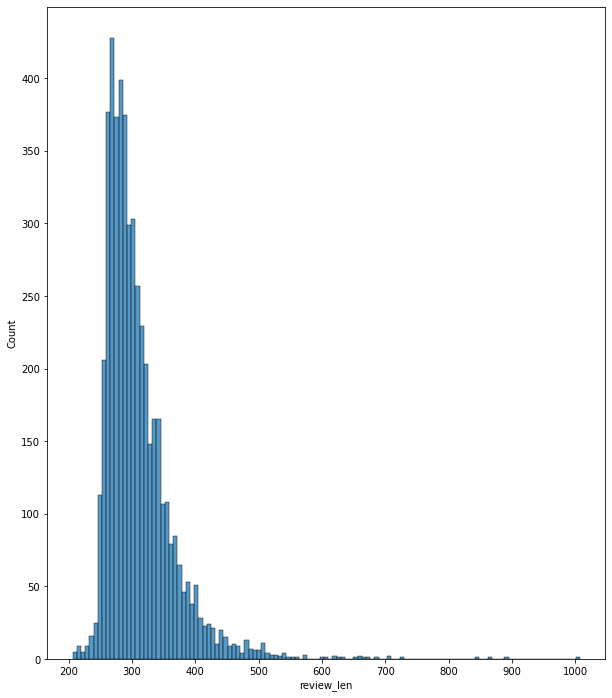

In [ ]:
fig=plt.subplots(figsize=(10,12))

sns.histplot(data=data, x='review_len')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


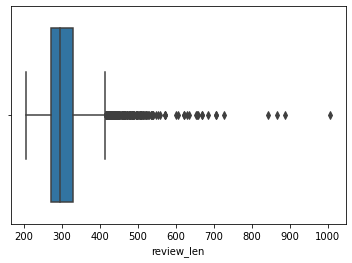

In [ ]:
sns.boxplot(data['review_len'])

The distributon of Review length is positively skewed,and it is having lots of outliers.

#See distribution of words in each reviews

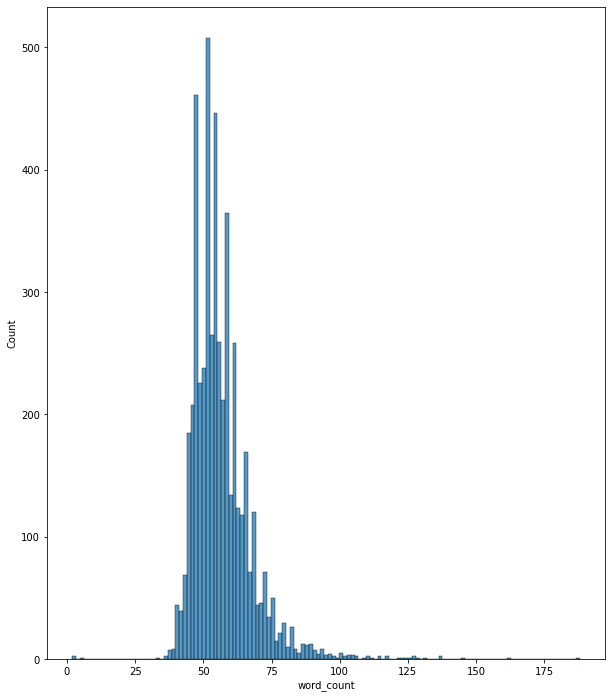

In [ ]:
fig=plt.subplots(figsize=(10,12))

sns.histplot(data=data, x='word_count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


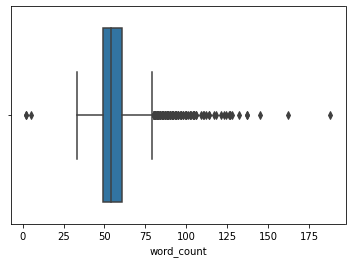

In [ ]:
sns.boxplot(data['word_count'])

This also Positively skewed distribution having outliers.

#Create word cloud for each Sentiment Positive,Neutral and Negative

In [ ]:
df_positive_reviews=data[data['sentiment']=='Positive']['no_stop_word_reviews']

In [ ]:
df_positive_reviews_join=' '.join(df_positive_reviews)

In [ ]:
wc_positive_reviews = WordCloud(width=800, height=600, stopwords=STOPWORDS)

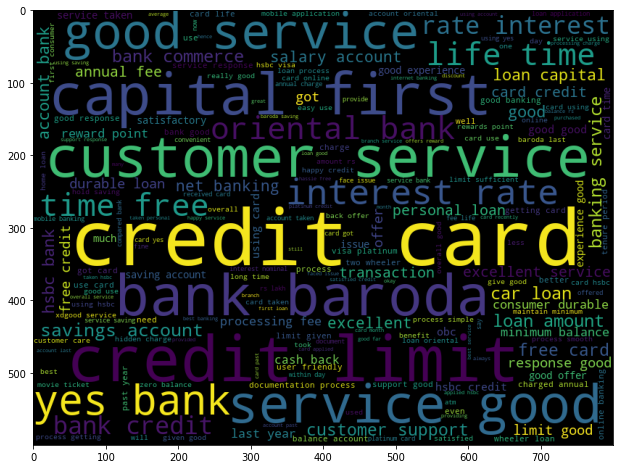

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wc_positive_reviews.generate_from_text(df_positive_reviews_join))

In [ ]:
from collections import Counter

In [ ]:
reviews_token_positive=re.findall('\w+',df_positive_reviews_join)

In [ ]:
token_no_stopwords_positive=[x for x in reviews_token_positive if x not in STOPWORDS ]

In [ ]:
#Lets see top 20 most frequent words
C = Counter(token_no_stopwords_positive)
C.most_common(20)

[('good', 5993),
 ('card', 5613),
 ('bank', 4192),
 ('service', 3418),
 ('credit', 3067),
 ('loan', 2974),
 ('time', 1884),
 ('account', 1780),
 ('customer', 1736),
 ('limit', 1505),
 ('interest', 1314),
 ('banking', 1284),
 ('rate', 1214),
 ('process', 1163),
 ('first', 1039),
 ('using', 1026),
 ('capital', 1006),
 ('services', 973),
 ('baroda', 960),
 ('years', 943)]

Above Word cloud for Positive sentiment shows that "good" is most repeated word in reviews of customer who has given Positive sentiments.
As it is a bank reveiws,So "card","bank","loan" are among most used words.

In [ ]:
df_neutral_reviews=data[data['sentiment']=='Neutral']['no_stop_word_reviews']

In [ ]:
df_neutral_reviews_join=' '.join(df_neutral_reviews)

In [ ]:
wc_neutral_reviews = WordCloud(width=800, height=600, stopwords=STOPWORDS)

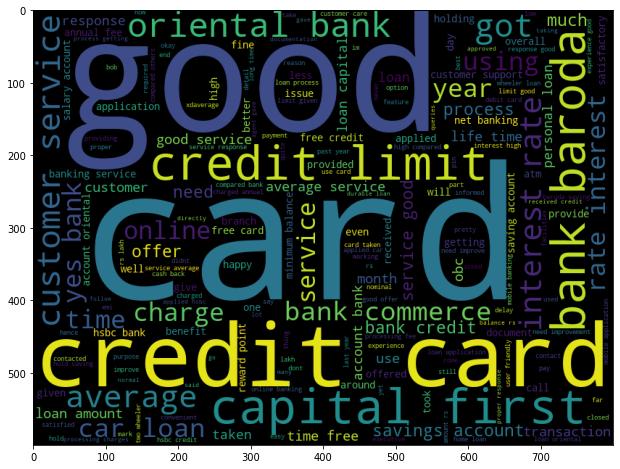

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wc_neutral_reviews.generate_from_text(df_neutral_reviews_join))

In [ ]:
reviews_token_neutral=re.findall('\w+',df_neutral_reviews_join)

In [ ]:
token_no_stopwords_negative=[x for x in reviews_token_neutral if x not in STOPWORDS ]

In [ ]:
#Lets see top 20 most frequent words
C = Counter(token_no_stopwords_negative)
C.most_common(20)

[('card', 737),
 ('bank', 667),
 ('good', 605),
 ('service', 480),
 ('loan', 465),
 ('credit', 452),
 ('account', 272),
 ('time', 248),
 ('customer', 244),
 ('interest', 243),
 ('average', 235),
 ('rate', 226),
 ('limit', 223),
 ('banking', 168),
 ('first', 168),
 ('capital', 160),
 ('got', 157),
 ('process', 151),
 ('response', 149),
 ('baroda', 148)]

In [ ]:
df_negative_reviews=data[data['sentiment']=='Negative']['no_stop_word_reviews']

In [ ]:
df_negative_reviews_join=' '.join(df_negative_reviews)

In [ ]:
wc_negative_reviews = WordCloud(width=800, height=600, stopwords=STOPWORDS)

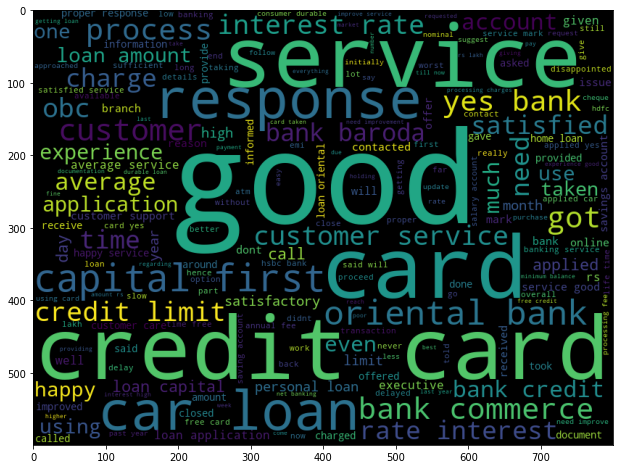

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wc_negative_reviews.generate_from_text(df_negative_reviews_join))

In [ ]:
reviews_token_negative=re.findall('\w+',df_negative_reviews_join)

In [ ]:
token_no_stopwords_negative=[x for x in reviews_token_negative if x not in STOPWORDS ]

In [ ]:
#Lets see top 20 most frequent words
C = Counter(token_no_stopwords_negative)
C.most_common(20)

[('bank', 471),
 ('loan', 420),
 ('card', 362),
 ('service', 354),
 ('credit', 244),
 ('customer', 220),
 ('good', 198),
 ('interest', 190),
 ('rate', 173),
 ('response', 172),
 ('car', 156),
 ('first', 148),
 ('capital', 135),
 ('account', 134),
 ('limit', 134),
 ('oriental', 130),
 ('time', 123),
 ('process', 117),
 ('application', 113),
 ('got', 105)]

#Extracting Features from Cleaned reviews
Before we build the model for our sentiment analysis, it is required to convert the review texts into vector formation as computer cannot understand words and their sentiment. In this project, we are going to use TF-TDF method to convert the texts.



#Encoding target variable-sentiment

Let's encode our target variable with Label encoder.



In [ ]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
data['sentiment']= label_encoder.fit_transform(data['sentiment']) 
  
data['sentiment'].unique() 

array([2, 1, 0])

In [ ]:
data['sentiment'].value_counts()


2    3944
1     611
0     443
Name: sentiment, dtype: int64

Value counts of encoded variable shows class "2" has very high number of records compared to "0" and "1".This is known as imbalance in dataset.\
Imbalance in the data can be handled by using some methods like SMOTE(Synthetic Minority Oversampling Technique) and balancedbaggingclassifier  but we have not used that here.

#TFIDF(Term Frequency — Inverse Document Frequency)


In [ ]:
tfidf_total = TfidfVectorizer(stop_words=STOPWORDS,ngram_range=(1,2),
                        max_df=0.7, min_df = 10,
                        token_pattern="[a-z']+")

In [ ]:
X_total = tfidf_total.fit_transform(data['no_stop_word_reviews'])

In [ ]:
X_total

<4998x2674 sparse matrix of type '<class 'numpy.float64'>'
	with 183998 stored elements in Compressed Sparse Row format>

From the above result,there are total 2674 unique words and they are forming a sparse matrix.\
For faster computation we are using only 200-500 most important words.

In [ ]:
tfidf = TfidfVectorizer(stop_words=STOPWORDS,ngram_range=(1,2),
                        max_df=0.7, min_df = 10,
                        token_pattern="[a-z']+",max_features=200)

In [ ]:
X = tfidf.fit_transform(data['no_stop_word_reviews'])
X

<4998x200 sparse matrix of type '<class 'numpy.float64'>'
	with 103032 stored elements in Compressed Sparse Row format>

In [ ]:
#Getting the target variable(encoded)
y=data['sentiment']

#Train test split:

In [ ]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=0)

#Model Selection:

#Logistic regression

In [ ]:
#Create a instance for Logistic regression model
lr = LogisticRegression(random_state=0)


In [ ]:
cv_values=range(2,15)
cross_val_score_list=[]
for v in cv_values:
  value=cross_val_score(lr,X=X,y=data.sentiment,cv=v,scoring='accuracy').mean()
  cross_val_score_list.append(value)



#Find optimum value of K fold CV.


In [ ]:
cross_val_score_list

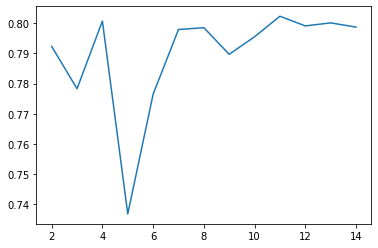

In [ ]:
plt.plot(cv_values,cross_val_score_list)
plt.show()

From the plot it is clear that cv=11 gives highest mean Accuracy.\
So taking this value as optimum CV for Logistic regression.

In [ ]:
cross_val_score(lr, X=X, y=data.sentiment, cv=11, scoring = 'accuracy').mean()

0.8023104648655309

#Mean accuracy using Logistic regression coming to be 81%.

#Use Random forest

In [ ]:
rf = RandomForestClassifier(n_estimators=500)
cross_val_score(rf,X=X, y=data.sentiment, cv=10, scoring = 'accuracy').mean()

0.7829210420841684

#Using train test split:

#Logisitic regression

In [ ]:
logreg = LogisticRegression(max_iter=500,random_state=1)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


#KNN classifier

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print('Accuracy of Knn classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of Knn classifier on test set: 0.77


#Decision Tree

In [ ]:
dec_tree_class=DecisionTreeClassifier()
dec_tree_class.fit(X_train,y_train)
y_pred=dec_tree_class.predict(X_test)
print('Accuracy of Decision tree classifier on test set: {:.2f}'.format(dec_tree_class.score(X_test, y_test)))

Accuracy of Decision tree classifier on test set: 0.72


#Naive bayes Classifier

In [ ]:
naive_clf = MultinomialNB().fit(X_train,y_train)
naive_clf.predict(X_test)
print('Accuracy of Naive BAyes classifier on test set: {:.2f}'.format(naive_clf.score(X_test, y_test)))

Accuracy of Naive BAyes classifier on test set: 0.79


#Stochastic gradient descent

In [ ]:
sgd_clf=SGDClassifier()
sgd_clf.fit(X_train,y_train)
y_pred=sgd_clf.predict(X_test)
print('Accuracy of Stochastic gradient descent on test set: {:.2f}'.format(sgd_clf.score(X_test, y_test)))

Accuracy of Stochastic gradient descent on test set: 0.80


#View clsuter using TSNE

In [ ]:
tsne = TSNE(n_components=2, n_iter=1500, n_jobs = -1)
tsne_mat = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



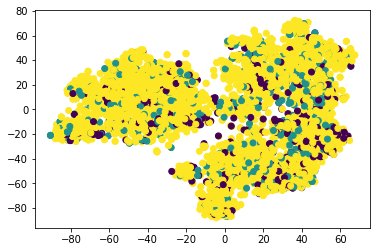

In [ ]:
plt.scatter(tsne_mat[:,0],tsne_mat[:,1],c = data['sentiment'])  

#Conclusion:

1.Among all the models used,Logistic regression performed very well in its basic form without doing any hyper parameter optimisation.\
2.Logistic regression giving 81% accuracy.\
3.Text Analyis can like the work we have done help companies to understand about customer using NLP,machine learning etc.which will help companies in making profit.


Reference website:https://github.com/BenRoshan100/Sentiment-analysis-Amazon-reviews/blob/master/sentiment-analysis-amazon-reviews.ipynb